# Plotting

We will plot with 3 datasets this week. Let's load them. 

In [1]:
%matplotlib inline

import datetime

# these three are used to open the CCM dataset:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

import matplotlib.pyplot as plt  # for figure customizing
import numpy as np
import pandas as pd
import pandas_datareader as pdr  # IF NECESSARY, from terminal: pip install pandas_datareader
import seaborn as sns
from numpy.random import default_rng

pd.set_option("display.max_rows", 10)  # display option for pandas
# more here: https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

## Load macro_data

In [2]:
# LOAD DATA AND CONVERT TO ANNUAL

start = 1990 # pandas datareader can infer these are years
end = 2018
macro_data = pdr.data.DataReader(['CAUR','MIUR','PAUR', # unemployment 
                                  'LXXRSA','DEXRSA','WDXRSA', # case shiller index in LA, Detroit, DC (no PA  available!)
                                  'MEHOINUSCAA672N','MEHOINUSMIA672N','MEHOINUSPAA672N'], #  
                                 'fred', start, end)
macro_data = macro_data.resample('Y').first() # get's the first observation for each variable in a given year

# CLEAN UP THE FORMATING SOMEWHAT

macro_data.index = macro_data.index.year
macro_data.columns=pd.MultiIndex.from_tuples([
    ('Unemployment','CA'),('Unemployment','MI'),('Unemployment','PA'),
    ('HouseIdx','CA'),('HouseIdx','MI'),('HouseIdx','PA'),
    ('MedIncome','CA'),('MedIncome','MI'),('MedIncome','PA')
    ])



Make two versions of that data: wide and tall

In [3]:
year_state_tall = macro_data.stack().reset_index().rename(columns={'level_1':'state'}).sort_values(['state','DATE'])    

year_state_wide = macro_data
# one level names
year_state_wide.columns=[
    'Unemployment_CA','Unemployment_MI','Unemployment_PA',
    'HouseIdx_CA','HouseIdx_MI','HouseIdx_PA',
    'MedIncome_CA','MedIncome_MI','MedIncome_PA'
    ]

In [4]:
year_state_wide

,Unemployment_CA,Unemployment_MI,Unemployment_PA,HouseIdx_CA,HouseIdx_MI,HouseIdx_PA,MedIncome_CA,MedIncome_MI,MedIncome_PA
DATE,,,,,,,,,
1990,5.2,7.7,5.2,100.471193,NaN,93.362855,64124.0,57665.0,55870.0
1991,7.1,8.8,6.5,95.569015,58.420806,89.706871,62568.0,59693.0,56440.0
1992,8.6,9.5,7.4,92.786926,59.748947,88.573807,63297.0,58517.0,54191.0
1993,9.8,7.6,7.2,85.246295,61.564205,89.065118,60272.0,57776.0,54827.0
1994,9.3,7.2,6.7,77.395052,64.526663,88.988467,61219.0,61138.0,55562.0
...,...,...,...,...,...,...,...,...,...
2014,8.2,8.1,6.5,216.522259,95.259217,206.947728,66201.0,56917.0,60385.0
2015,6.8,6.0,5.5,228.186188,98.231964,208.677717,69527.0,59221.0,65980.0
2016,5.7,4.9,5.3,243.379080,104.886076,212.055794,71879.0,61582.0,65776.0


## And load CCM data

First, load the data

In [5]:
# url = 'https://github.com/LeDataSciFi/ledatascifi-2022/blob/main/data/CCM_cleaned_for_class.zip?raw=true'

# #firms = pd.read_stata(url)   
# # <-- that code would work, but GH said it was too big and
# # forced me to zip it, so here is the work around to download it:

# with urlopen(url) as request:
#     data = BytesIO(request.read())

# with ZipFile(data) as archive:
#     with archive.open(archive.namelist()[0]) as stata:
#         ccm = pd.read_stata(stata)

## Sidebar: Here's a fun EDA hack:

https://github.com/pandas-profiling/pandas-profiling#examples

Notes
- Slow with huge datasets
- Doesn't wrk with multiindex column names (must be "one level")

In [6]:
# install new package (run this one time only)
# !pip install pandas-profiling[notebook]

In [7]:
# from pandas_profiling import ProfileReport

# create the report:
# profile = ProfileReport(year_state_wide, title="Pandas Profiling Report")
# profile


_Weird technical note: When I import ProfileReport, I have to run `%matplotlib inline` again after it._

[_This is a known issue with ProfileReport, perhaps an update to it later will fix it._](https://github.com/pandas-profiling/pandas-profiling/pull/893) _For now, we have to do a workaround ang either not import ProfileReport, or import it and then run `%matplotlib inline` again._

----

## Exercises


From the `year_state` data (wide or tall):

- Q0. How has median income has evolved over time for PA?
    - 920am: Wasti and Lana
    - 1045am: Jake and Cole

<AxesSubplot:xlabel='DATE'>

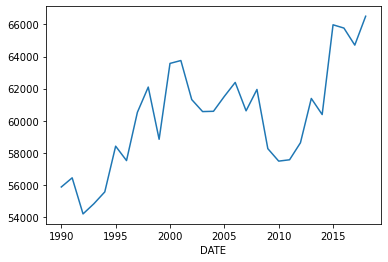

In [8]:
# pandas built in plot function 
year_state_wide["MedIncome_PA"].plot()

<AxesSubplot:xlabel='DATE', ylabel='MedIncome_PA'>

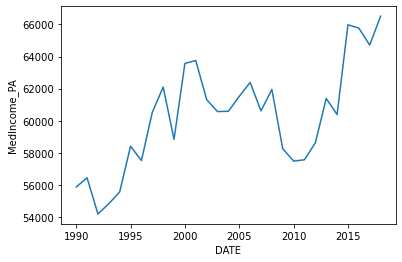

In [9]:
# seaborn, from the wide version
sns.lineplot(data=year_state_wide, 
             x="DATE", 
             y="MedIncome_PA")

<AxesSubplot:xlabel='DATE', ylabel='MedIncome'>

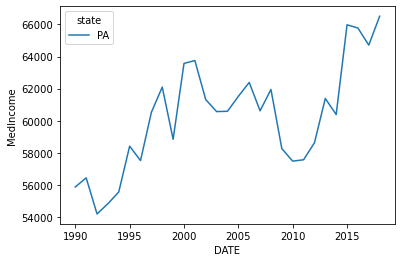

In [10]:
# seaborn from the tall dataset, need to filter to only the rows with PA
sns.lineplot(data=year_state_tall.query('state == "PA"'), 
             x="DATE", 
             y="MedIncome",
             hue='state')

<AxesSubplot:xlabel='DATE', ylabel='MedIncome'>

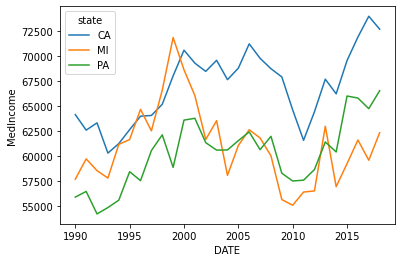

In [11]:
# seaborn tall, "hue" means you can plot separately for many categories 
sns.lineplot(data=year_state_tall, 
             x="DATE", 
             y="MedIncome",
             hue='state')

- Q1. How has unemployment changes has evolved over time for PA?   
- Q2. How has unemployment changes  has evolved over time for all states (view as one var)?  
- Q3. How has unemployment changes  has evolved over time for all states (separately)  
- Q4. How does unemployment changes vary with median income growth?

From the `ccm` data:

- Q5. Plot the distribution of R&D (`xrd_a`). Bonuses:
    - deal with outliers
    - add a title
    - change the x and y axis titles
- Q6: Compare R&D and CAPX. Bonuses:
    - don't plot outliers
    - avoid oversaturated plot